In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats

### Generate the data

In [2]:
def generate_data(theta=1, n=50):
    return scipy.stats.uniform(scale=theta).rvs(size=n)

### The estimator

In [3]:
def theta_estimator(data):
    return max(data)

### Parametric bootstrap replications

In [4]:
def parametric_bootstrap_replications(theta_estimate, n, B):
    return np.array([
        theta_estimator(
            scipy.stats.uniform.rvs(scale=theta_estimate, size=n)
        )
        for _ in range(B)
    ])

### Nonarametric bootstrap replications

In [5]:
def nonparametric_bootstrap_resample(data):
    return random.choices(population=data, k=len(data))

def nonparametric_bootstrap_replications(data=generate_data(), estimator=theta_estimator, B=1000):
    return [estimator(nonparametric_bootstrap_resample(data)) for _ in range(B)]

### Compare the bootstrap distribution with the true distribution of the estimator

The true PDF of the estimator

In [6]:
def f(x, n=50):
    if 0 < x < 1:
        return n*(x**(n-1))

In [87]:
def plot_distributions(theta=1, n=50, B=int(1e3)):

    # Focuses the graphs on the meaningful region where x > lower_x_cutoff
    lower_x_cutoff = 0.8

    # Generate the initial data
    data = generate_data(theta=theta, n=n)
    # Estimate theta
    theta_estimate = theta_estimator(data)

    # Generate the parametric bootstrap data
    parametric_replicated_data = parametric_bootstrap_replications(theta_estimate=theta_estimate, n=n, B=B)
    # Plot the parametric bootstrap data
    plt.hist(parametric_replicated_data, alpha=0.5, density=True, label='Parametric replications')

    # Generate the nonparametric bootstrap data
    nonparametric_replicated_data = np.array(nonparametric_bootstrap_replications(data))
    # Plot the nonparametric bootstrap data
    plt.hist(nonparametric_replicated_data, alpha=0.5, density=True, label='Nonparametric replications')

    # Plot the true distribution
    x = np.linspace(start=lower_x_cutoff, stop=1, num=1000)
    y = [f(xi) for xi in x]
    plt.plot(x, y, label='True distribution')

    # Plot legend and axes
    plt.legend(loc='upper left')
    ax = plt.gca()
    ax.set_xlim((lower_x_cutoff, 1.005))
    ax.get_yaxis().set_visible(False)
    plt.show()
    
    # For post-mortem analysis
    return data

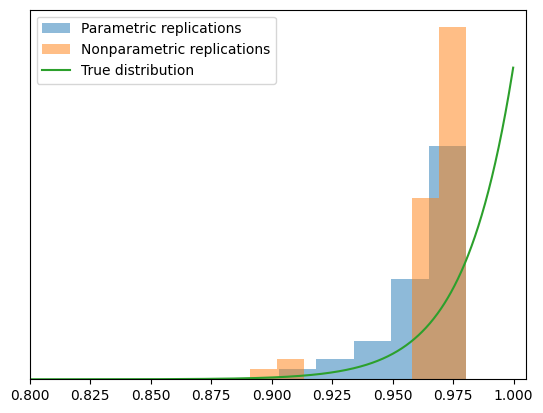

In the original dataset, the maximum value is 0.98.


In [97]:
data = plot_distributions(theta=1, n=int(5e1), B=int(1e3))
print(f"In the original dataset, the maximum value is {data.max():.2f}.")